# Basic image analysis using gpt-vision

In [1]:
from openai import OpenAI
import openai

import matplotlib.pyplot as plt

from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv("OPENAI_API_KEY") # Replace with your API key

In [3]:
prompt = """
Tell a one paragraph dramatic story for a picture that I show you, including:

- What has led up to the event shown
- What is happening in the scene
- The thoughts and feelings of characters
- The outcome of the story

Your description should be close to real speech, including any fillers. Pretend that you are talking to me."""

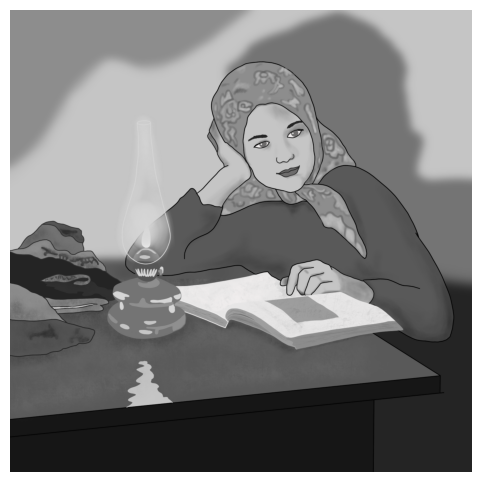

In [4]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(plt.imread('../images/new_images/image_1.png'))
ax.axis('off')
plt.show()

In [5]:
import base64
import requests

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "../images/new_images/image_1.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": prompt
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/png;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 512
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [6]:
print(response.json()['choices'][0]['message']['content'])

Okay, so, imagine this young woman, right? She's been studying for hours, under the dim glow of that old oil lamp. It's like, the night before her big final exam, and the electricity has just gone out in her neighborhood. Classic, huh? There she sits, her textbooks piled high on the desk, and you can tell by the look in her eyes that she's just so, um, absorbed in the material—determined, you know? Her thoughts are probably racing with formulas and facts, while also, I don't know, maybe she's worrying about whether she's prepared enough.

Now, in the scene, she's clearly reached a moment of rest, a brief pause where she's looking up and her mind is just... wandering. Perhaps she's contemplating the weight of the moment, or maybe she's dreaming of a future where all this hard work has paid off. Her hand is resting lightly against her cheek, suggesting a mix of fatigue and, like, contemplation.

So, as for the outcome, let's say, um, after a few moments of silence in the shadowy room, sh

## Being systematic

This is great, but suppose we want to run many of these, perhaps using different prompts?

In [10]:
import sys  
import os
sys.path.append("/home/rkd43/Teaching/large-language-models")

In [11]:
from agents.vision_agent import VisionAgent

In [12]:
agent = VisionAgent(mode='normal')
image_folder = "../images/new_images"

transcripts = []
image_names = []
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    image_names.append(image_name)
    
    response = agent.get_response(image_path, image_name.strip(".png"), dump=False)

    transcript = response['choices'][0]['message']['content']
    transcripts.append(transcript)

In [13]:
print(transcripts[0])

Alright, let me weave you a tale about this picture. So, leading up to this scene, there's been a massive power outage in the village—it's been going on for hours now, and it's really thrown everyone's evening routines out of whack. In the midst of this, our protagonist, a young woman, had an important exam to study for. Without even a flicker of lights, she's had to rely on an old oil lamp to read her textbooks.

Now, as we look at this scene, she's deep into her studies, trying to focus despite the flickering shadows cast by the lamp. See, she's sort of resting her chin on her hand, looking a bit tired but also determined. Her expression, it's a mix of weariness and resolve. She's got this quiet strength about her, a dedication to her education that's not going to be dimmed by a little—or a lot—of darkness.

And her thoughts, I imagine, are a swirling blend of concern for the exam and a little annoyance at the power situation, but underneath it all, there's a current of pride for sti